# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama**: Mohammad Iqbal Jaffar
- **E-mail**: iqbaljaffar1108@gmail.com
- **ID Dicoding**: miqbalj

## Menentukan Pertanyaan Bisnis

- Apa produk terlaris dan produk yang kurang laris di platform E-commerce?
- Bagaimana tren performa penjualan E-commerce dari waktu ke waktu?
- Berapa total pendapatan E-commerce dalam beberapa bulan terakhir?
- Bagaimana rating atau penilaian yang diberikan oleh pelanggan terhadap E-commerce?
- Bagaimana distribusi pelanggan di platform E-commerce, dan apakah ada perbedaan preferensi pembelian di antara kelompok pelanggan yang berbeda?

## Import & Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kode ini digunakan untuk **memasang Google Drive ke dalam lingkungan Google Colab**, sehingga memungkinkan pengguna untuk mengakses file dan folder yang ada di Google Drive melalui path `/content/drive`.

In [2]:
!pip install geopandas
!pip freeze > /content/drive/MyDrive/Submission/requirements.txt

Kode ini menginstal library `geopandas` dan kemudian menyimpan daftar semua package Python yang terinstal beserta versinya ke dalam file `requirements.txt` yang berada di Google Drive pada folder `Submission`.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from datetime import datetime

Kode ini mengimpor pustaka yang digunakan untuk analisis data (NumPy, Pandas), visualisasi data (Matplotlib, Seaborn), pemrosesan data geospasial (GeoPandas), dan manipulasi waktu (datetime).

In [4]:
with open('/content/drive/MyDrive/Submission/requirements.txt', 'r') as file:
    print(file.read())

absl-py==1.4.0
accelerate==0.34.2
aiohappyeyeballs==2.4.0
aiohttp==3.10.5
aiosignal==1.3.1
alabaster==0.7.16
albucore==0.0.15
albumentations==1.4.15
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.18.0
asn1crypto==1.5.1
astropy==6.1.3
astropy-iers-data==0.2024.9.12.13.29.57
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==24.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.16.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.17.0
bigquery-magics==0.2.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.4.3
bqplot==0.12.43
branca==0.7.2
build==1.2.2
CacheControl==0.14.0
cachetools==5.5.0
catalogue==2.0.10
certifi==2024.8.30
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
clarabel==0.9.0
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.19.0
cloudpickle==2.2.1
cmake==3.30.3
cmdstanpy==1.2.4
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5

Kode ini membuka file `requirements.txt` yang terletak di Google Drive, membaca isinya, dan kemudian mencetaknya ke layar, sambil juga mengimpor modul `datetime` dari pustaka standar Python.

## Data Wrangling

### Gathering Data

In [5]:
customer_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Kode ini membaca file CSV bernama `customers_dataset.csv` dari Google Drive dan menampilkannya dalam bentuk dataframe dengan lima baris pertama menggunakan fungsi `head()`.

In [6]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Kode ini membaca file CSV bernama `geolocation_dataset.csv` yang berada di Google Drive ke dalam sebuah DataFrame bernama `geolocation_df`, dan kemudian menampilkan lima baris pertama dari dataset tersebut.

In [7]:
order_item_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Kode ini membaca file CSV bernama `order_items_dataset.csv` dari Google Drive dan memuatnya ke dalam DataFrame `order_item_df`, kemudian menampilkan 5 baris pertama dari data tersebut.

In [8]:
order_payment_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/order_payments_dataset.csv')
order_payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Kode ini membaca file CSV bernama `order_payments_dataset.csv` dari Google Drive ke dalam DataFrame `order_payment_df` dan menampilkan lima baris pertama dari data tersebut.

In [9]:
order_review_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/order_reviews_dataset.csv')
order_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Kode ini membaca file CSV bernama `order_reviews_dataset.csv` dari Google Drive menggunakan `pandas` dan menampilkan lima baris pertama dari data tersebut.

In [10]:
order_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/orders_dataset.csv')
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Kode ini membaca file CSV bernama `orders_dataset.csv` dari Google Drive dan memuatnya ke dalam DataFrame bernama `order_dataset_df`, kemudian menampilkan lima baris pertama dari data tersebut.

In [11]:
product_category_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Kode ini membaca file CSV yang berisi data kategori produk dari Google Drive dan menampilkan lima baris pertama dari DataFrame `product_category_df`.

In [12]:
product_dataset_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/products_dataset.csv')
product_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Kode ini memuat dataset produk dari file CSV yang terletak di Google Drive ke dalam DataFrame pandas dan menampilkan lima baris pertama dari DataFrame tersebut.

In [13]:
seller_df = pd.read_csv('/content/drive/MyDrive/Submission/Dataset/sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Kode ini memuat dataset penjual dari file CSV yang terletak di Google Drive ke dalam DataFrame `seller_df` dan menampilkan lima baris pertama dari DataFrame tersebut.

In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Kode `customer_df.info()` digunakan untuk menampilkan ringkasan informasi tentang DataFrame `customer_df`, termasuk jumlah total entri, jumlah nilai non-null di setiap kolom, tipe data kolom, dan penggunaan memori.

In [15]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Kode `geolocation_df.info()` digunakan untuk menampilkan ringkasan informasi tentang DataFrame `geolocation_df`, termasuk jumlah total baris, kolom, tipe data setiap kolom, dan jumlah nilai non-null pada setiap kolom.

In [16]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Kode `order_item_df.info()` menampilkan informasi ringkas tentang DataFrame `order_item_df`, termasuk jumlah entri, jumlah entri non-null per kolom, dan tipe data setiap kolom.

In [17]:
order_payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Kode ini menampilkan ringkasan informasi tentang DataFrame order_payment_df, termasuk jumlah entri, nama kolom, tipe data setiap kolom, dan jumlah nilai non-null di setiap kolom.

In [18]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Kode order_review_df.info() digunakan untuk menampilkan informasi ringkas tentang DataFrame order_review_df, termasuk jumlah total baris, jumlah nilai non-null di setiap kolom, tipe data kolom, dan penggunaan memori.

In [19]:
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Kode `order_dataset_df.info()` menampilkan ringkasan informasi tentang DataFrame `order_dataset_df`, termasuk jumlah total baris, kolom, serta tipe data dan jumlah nilai non-null di setiap kolom.

In [20]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Kode `product_category_df.info()` digunakan untuk menampilkan ringkasan informasi mengenai DataFrame `product_category_df`, termasuk jumlah entri non-null, tipe data dari setiap kolom, dan penggunaan memori.

In [21]:
product_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Perintah `product_dataset_df.info()` digunakan untuk menampilkan informasi ringkas tentang DataFrame `product_dataset_df`, termasuk jumlah baris, jumlah kolom, tipe data tiap kolom, serta jumlah nilai non-null dalam setiap kolom.

In [22]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Kode `seller_df.info()` digunakan untuk menampilkan informasi ringkas mengenai DataFrame `seller_df`, termasuk jumlah baris, kolom, tipe data setiap kolom, serta jumlah nilai non-null di setiap kolom.

**Insight:**
- Anomali data entries dan tipe data pada file `order_reviews_dataset`
- Anomali data entries dan tipe data pada file `orders_dataset`
- Anomali data entries pada file `product_dataset`


### Assessing Data

**Cek Data Duplikat**

In [23]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())
customer_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Kode ini mencetak jumlah baris duplikat dalam `customer_df` dan kemudian menampilkan ringkasan statistik deskriptif dari DataFrame tersebut.

In [24]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Kode tersebut mencetak jumlah baris duplikat dalam DataFrame `geolocation_df` dan kemudian menampilkan statistik deskriptif dari DataFrame tersebut.

In [25]:
print("Jumlah duplikasi: ", order_item_df.duplicated().sum())
order_item_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Kode ini mencetak jumlah baris duplikat dalam DataFrame `order_item_df` dan kemudian menampilkan statistik deskriptif dari DataFrame tersebut.

In [26]:
print("Jumlah duplikasi: ", order_payment_df.duplicated().sum())
order_payment_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Kode ini mencetak jumlah duplikasi dalam DataFrame `order_payment_df` dan kemudian menampilkan deskripsi statistik dari DataFrame tersebut.

In [27]:
print("Jumlah duplikasi: ", order_review_df.duplicated().sum())
order_review_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Kode ini menghitung dan menampilkan jumlah baris duplikat dalam DataFrame `order_review_df` serta memberikan ringkasan statistik dari kolom-kolom numerik dalam DataFrame tersebut.

In [28]:
print("Jumlah duplikasi: ", order_dataset_df.duplicated().sum())
order_dataset_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Kode ini mencetak jumlah baris yang duplikat dalam `order_dataset_df` dan kemudian menampilkan ringkasan statistik deskriptif dari dataset tersebut.

In [29]:
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
product_category_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Kode tersebut mencetak jumlah baris duplikat dalam DataFrame `product_category_df` dan kemudian menampilkan ringkasan statistik deskriptif dari DataFrame tersebut.

In [30]:
print("Jumlah duplikasi: ", product_dataset_df.duplicated().sum())
product_dataset_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Kode ini menghitung dan mencetak jumlah baris duplikat dalam DataFrame `product_dataset_df`, dan kemudian menampilkan ringkasan statistik deskriptif dari DataFrame tersebut.

In [31]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())
seller_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Kode ini menampilkan jumlah baris yang memiliki duplikasi di DataFrame `seller_df`, dan kemudian memberikan ringkasan statistik dari DataFrame tersebut.

Cek masalah pada `order_review_df`


In [32]:
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Kode `order_review_df.isna().sum()` menghitung jumlah nilai yang hilang (NaN) di setiap kolom dari DataFrame `order_review_df`.

In [33]:
order_review_df[order_review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Kode ini memilih baris dari DataFrame `order_review_df` di mana nilai pada kolom `review_comment_title` adalah `NaN` (hilang).

In [34]:
order_review_df[order_review_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


Kode ini akan menampilkan baris-baris dari DataFrame `order_review_df` di mana kolom `review_comment_message` memiliki nilai yang hilang (NaN).

Cek masalah pada `order_dataset_df`

In [35]:
order_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Kode `order_dataset_df.isna().sum()` menghitung jumlah nilai yang hilang (missing values) untuk setiap kolom dalam DataFrame `order_dataset_df`.

In [36]:
order_dataset_df[order_dataset_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Kode ini menyaring baris dari `order_dataset_df` di mana kolom `order_approved_at` memiliki nilai yang hilang (NaN).

In [37]:
order_dataset_df[order_dataset_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Kode ini akan mengembalikan semua baris dari `order_dataset_df` di mana kolom `order_delivered_carrier_date` memiliki nilai yang hilang (NaN).

In [38]:
order_dataset_df[order_dataset_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Kode ini menampilkan baris-baris dari `order_dataset_df` di mana nilai pada kolom `order_delivered_customer_date` adalah NaN (hilang).

**Insight**
- Terdapat duplikasi data di file `geolocation_dataset.csv`; namun, entri data tersebut normal dan terduplikasi pada data penting.
- Pada file `order_review_dataset.csv`, terdapat anomali pada kolom `review_comment_title` sebanyak 87,656 entri dan `review_comment_message` sebanyak 58,247 entri.
- Pada file `orders_dataset.csv`, terdapat anomali pada kolom `order_approved_at` sebanyak 160 entri, `order_delivered_carrier_date` sebanyak 1,783 entri, dan `order_delivered_customer_date` sebanyak 2,965 entri.


### CLEANING DATA

Data duplikat yang terdapat pada dataset Geolocation tidak saya hilangkan (drop) karena kemungkinan duplikasi tersebut terjadi pada kolom `geolocation_city` dan `geolocation_state`, di mana nilai tertinggi berasal dari São Paulo (SP).


Perbaiki anomali data entries pada `order_review_df`

In [39]:
order_review_df['review_comment_title'].fillna('No Title', inplace=True)

# Verifikasi jumlah entri yang sekarang tidak kosong
print(order_review_df['review_comment_title'].isna().sum())

0


Kode tersebut menggantikan nilai kosong dalam kolom 'review_comment_title' pada `order_review_df` dengan string 'No Title', kemudian mencetak jumlah entri yang masih kosong di kolom tersebut setelah penggantian.

In [40]:
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Kode `order_review_df.isna().sum()` menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom dari DataFrame `order_review_df`.

In [41]:
order_review_df['review_comment_message'].fillna('99224', inplace=True)

# Memastikan perubahan telah dilakukan
print(order_review_df['review_comment_message'].isna().sum())

0


Kode tersebut mengisi nilai yang hilang dalam kolom `review_comment_message` pada DataFrame `order_review_df` dengan string `'99224'` dan kemudian memeriksa jumlah nilai yang masih hilang di kolom tersebut untuk memastikan bahwa tidak ada nilai yang hilang.

In [42]:
order_review_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Kode ini menghitung jumlah nilai yang hilang (NaN) untuk setiap kolom dalam DataFrame `order_review_df`

In [43]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Kode `order_review_df.info()` digunakan untuk menampilkan informasi ringkas mengenai DataFrame `order_review_df`, termasuk jumlah entri, nama kolom, tipe data masing-masing kolom, serta jumlah nilai non-null pada setiap kolom.

Rubah anomali tipe data pada `order_review_df`

In [44]:
datetime_columns = ["review_creation_date", "review_answer_timestamp" ]

for column in datetime_columns:
  order_review_df[column] = pd.to_datetime(order_review_df[column])

Kode ini mengonversi kolom tanggal dan waktu dalam DataFrame `order_review_df` ke format datetime menggunakan Pandas.

In [45]:
order_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Perintah `order_review_df.info()` menampilkan informasi ringkas tentang DataFrame `order_review_df`, termasuk jumlah baris, jumlah kolom, tipe data setiap kolom, dan jumlah nilai non-null pada setiap kolom.

Perbaiki anomali data entries pada `order_dataset_df`

In [46]:
# Mengisi nilai NaN pada 'order_approved_at' dengan NaT untuk status 'canceled'
order_dataset_df.loc[order_dataset_df['order_status'] == 'canceled', 'order_approved_at'] = pd.NaT

# Jika diperlukan, Anda bisa mengisi nilai NaT yang tersisa dengan tanggal default tertentu
default_date = pd.Timestamp('2024-01-01')  # Ganti dengan tanggal yang sesuai jika diperlukan
order_dataset_df['order_approved_at'].fillna(default_date, inplace=True)


Kode ini mengisi nilai `NaN` pada kolom `'order_approved_at'` dengan `NaT` untuk baris yang memiliki status `'canceled'` dan kemudian mengganti sisa nilai `NaT` yang ada dengan tanggal default tertentu.

In [47]:
order_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Kode `order_dataset_df.isna().sum()` digunakan untuk menghitung jumlah nilai yang hilang (NaN) pada setiap kolom dalam DataFrame `order_dataset_df`.

In [48]:
# Menggunakan metode bfill untuk imputasi nilai yang hilang
order_dataset_df['order_delivered_carrier_date'].fillna(method='bfill', inplace=True)

<ipython-input-48-f7d878b7a41d>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  order_dataset_df['order_delivered_carrier_date'].fillna(method='bfill', inplace=True)


Kode ini menggunakan metode `bfill` untuk mengisi nilai yang hilang di kolom `'order_delivered_carrier_date'` dengan nilai dari baris berikutnya dalam DataFrame `order_dataset_df`.

In [49]:
order_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Kode `order_dataset_df.isna().sum()` digunakan untuk menghitung jumlah nilai yang hilang (missing values) di setiap kolom dalam DataFrame `order_dataset_df`.

In [50]:
order_dataset_df['order_delivered_customer_date'].fillna(order_dataset_df['order_estimated_delivery_date'], inplace=True)


Kode ini menggantikan nilai yang hilang pada kolom `order_delivered_customer_date` dengan nilai dari kolom `order_estimated_delivery_date` di DataFrame `order_dataset_df`, langsung di tempat (inplace).

In [51]:
order_dataset_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


Kode order_dataset_df.isna().sum() menghitung jumlah nilai yang hilang (NaN) untuk setiap kolom dalam DataFrame `order_dataset_df`.

In [52]:
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99441 non-null  object
 5   order_delivered_carrier_date   99441 non-null  object
 6   order_delivered_customer_date  99441 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Kode `order_dataset_df.info()` digunakan untuk menampilkan informasi ringkas tentang DataFrame `order_dataset_df`, termasuk jumlah entri, nama kolom, tipe data setiap kolom, dan jumlah nilai non-null pada masing-masing kolom.

Rubah anomali tipe data pada `order_dataset_df`

In [53]:
datetime_columns = ["order_purchase_timestamp", "order_delivered_carrier_date", "order_delivered_customer_date","order_estimated_delivery_date" ]

for column in datetime_columns:
  order_dataset_df[column] = pd.to_datetime(order_dataset_df[column])

Kode ini mengonversi kolom-kolom tanggal dalam dataframe `order_dataset_df` yang tercantum dalam `datetime_columns` menjadi format tipe data `datetime` menggunakan pandas.

In [54]:
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  99441 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(4)
memory usage: 6.1+ MB


`order_dataset_df.info()` digunakan untuk menampilkan ringkasan informasi mengenai DataFrame `order_dataset_df`, termasuk jumlah baris, jumlah kolom, tipe data dari setiap kolom, dan jumlah nilai non-null di setiap kolom.

Perbaiki anomali data entries pada `product_dataset_df`

In [55]:
# Mengisi nilai kosong di kolom 'product_category_name' dengan modus kategori produk yang paling sering muncul
mode_category = product_dataset_df['product_category_name'].mode()[0]
product_dataset_df['product_category_name'].fillna(mode_category, inplace=True)

# Mengisi nilai kosong di kolom 'product_name_lenght' dengan rata-rata panjang nama produk
mean_name_length = product_dataset_df['product_name_lenght'].mean()
product_dataset_df['product_name_lenght'].fillna(mean_name_length, inplace=True)

# Mengisi nilai kosong di kolom 'product_description_lenght' dengan rata-rata panjang deskripsi produk
mean_description_length = product_dataset_df['product_description_lenght'].mean()
product_dataset_df['product_description_lenght'].fillna(mean_description_length, inplace=True)

# Mengisi nilai kosong di kolom 'product_photos_qty' dengan rata-rata jumlah foto produk
mean_photos_qty = product_dataset_df['product_photos_qty'].mean()
product_dataset_df['product_photos_qty'].fillna(mean_photos_qty, inplace=True)

# Mengisi nilai kosong di kolom 'product_weight_g' dengan rata-rata berat produk
mean_weight = product_dataset_df['product_weight_g'].mean()
product_dataset_df['product_weight_g'].fillna(mean_weight, inplace=True)

# Mengisi nilai kosong di kolom 'product_length_cm' dengan rata-rata panjang produk
mean_length = product_dataset_df['product_length_cm'].mean()
product_dataset_df['product_length_cm'].fillna(mean_length, inplace=True)

# Mengisi nilai kosong di kolom 'product_height_cm' dengan rata-rata tinggi produk
mean_height = product_dataset_df['product_height_cm'].mean()
product_dataset_df['product_height_cm'].fillna(mean_height, inplace=True)

# Mengisi nilai kosong di kolom 'product_width_cm' dengan rata-rata lebar produk
mean_width = product_dataset_df['product_width_cm'].mean()
product_dataset_df['product_width_cm'].fillna(mean_width, inplace=True)


Kode ini mengisi nilai kosong di berbagai kolom dalam DataFrame `product_dataset_df` dengan menggunakan metode imputasi yang sesuai: modus untuk kategori produk, dan rata-rata untuk panjang nama produk, panjang deskripsi produk, jumlah foto produk, berat produk, serta dimensi produk (panjang, tinggi, dan lebar).

In [56]:
product_dataset_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Kode `product_dataset_df.isna().sum()` digunakan untuk menghitung jumlah nilai yang hilang (NaN) di setiap kolom dalam DataFrame `product_dataset_df`.

Sekarang anomali data entries dan tipe data sudah diperbaiki

## Exploratory Data Analysis (EDA)

In [57]:
customer_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Kode `customer_df.describe(include="all")` digunakan untuk menghasilkan ringkasan statistik dari semua kolom dalam DataFrame `customer_df`, termasuk statistik deskriptif untuk kolom numerik dan non-numerik seperti frekuensi, nilai unik, dan modus.

In [58]:
customer_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
17348,b28d2c12d71823fd72befb7139c1efc4,9e4accf95024aa6565ca1efcadb96752,8550,poa,SP
96220,f64470f4048d3944248bfa31f71aad09,be67ce7b34880aba2e673aa2bb14f4a3,29930,sao mateus,ES
1495,7f34b35a198ead098d27d13705f084e2,f1fe705bc4a9f9b1508be25a3e4141f0,44085,feira de santana,BA
8666,831f66f86273e58c41a61f27987bbc13,26dde313f45cda2d37668485a62d259d,18270,tatui,SP
5433,fccc73b03ac8329be1c7b98011fd9638,59d0ac3d3078070efee3b06a5a77c035,40310,salvador,BA


Kode `customer_df.sample(5)` akan memilih secara acak 5 baris dari DataFrame `customer_df`.

In [59]:
customer_df.customer_id.is_unique

True

Kode `customer_df.customer_id.is_unique` memeriksa apakah semua nilai dalam kolom `customer_id` di DataFrame `customer_df` adalah unik, mengembalikan `True` jika ya, atau `False` jika ada duplikasi.

In [60]:
customer_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Kode ini mengelompokkan data pelanggan berdasarkan kota, menghitung jumlah unik `customer_id` untuk setiap kota, dan kemudian mengurutkan hasilnya dari yang terbanyak ke yang paling sedikit. Dan mendapatkan data bahwa customer paling banyak ada di kota sao paulo

In [61]:
customer_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Kode tersebut mengelompokkan data berdasarkan kolom `customer_state`, menghitung jumlah ID pelanggan yang unik untuk setiap negara bagian, dan kemudian mengurutkan hasilnya dari jumlah tertinggi ke terendah. Dan mendapatkan data bahwa customer paling banyak ada di negara bagian SP

In [62]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


Kode `geolocation_df.describe(include="all")` digunakan untuk menghasilkan ringkasan statistik deskriptif dari DataFrame `geolocation_df`, mencakup semua kolom dan tipe data, seperti nilai unik, frekuensi, dan statistik numerik jika ada.

In [63]:
order_item_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


Kode `order_item_df.describe(include="all")` menghasilkan ringkasan statistik deskriptif untuk seluruh kolom dalam DataFrame `order_item_df`, mencakup informasi seperti count, unique values, top values, dan frekuensi untuk kolom bertipe objek, serta statistik numerik untuk kolom bertipe numerik.

In [64]:
order_payment_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Kode `order_payment_df.describe(include="all")` menghasilkan ringkasan statistik dari DataFrame `order_payment_df`, termasuk informasi tentang distribusi data untuk semua kolom, baik yang numerik maupun kategorikal.

In [65]:
order_payment_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
66833,e4153bfffa13ee5e0cfea9d1d2529870,1,credit_card,7,169.61
93150,e2abaacfbaa87cb128b9c6675bcd2b98,1,boleto,1,39.62
36593,183e4a13a7a22a57bfd471656ec573b9,1,boleto,1,98.70
47942,771d0ce9e2f9b65e92d4acec6372d453,1,credit_card,3,39.22
81091,b414a769783b3ab82e49f4113c0edaae,1,credit_card,1,17.60


Kode `order_payment_df.sample(5)` digunakan untuk mengambil 5 baris acak dari DataFrame `order_payment_df`.

In [66]:
order_payment_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


Kode tersebut mengelompokkan data berdasarkan jenis pembayaran, kemudian menghitung jumlah pesanan unik untuk setiap jenis pembayaran, dan mengurutkannya secara menurun berdasarkan jumlah pesanan unik. Dan mendapatkan data bahwa order paling banyak menggunakan pembayaran credit card

In [67]:
order_review_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,99224,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Kode `order_review_df.describe(include="all")` digunakan untuk menghasilkan ringkasan statistik deskriptif dari semua kolom dalam DataFrame `order_review_df`, termasuk statistik untuk kolom numerik dan non-numerik seperti frekuensi nilai unik, nilai paling sering, dan distribusi data lainnya.

In [68]:
order_dataset_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,90302,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,2024-01-01 00:00:00,NaN,NaN,NaN
freq,1,1,96478,NaN,644,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,2018-01-04 20:36:01.832332544,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,2016-10-08 10:34:01,2016-09-30 00:00:00,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,2017-09-15 22:52:52,2017-09-22 21:28:06,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,2018-01-24 13:22:13,2018-02-01 19:34:49,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,2018-05-08 13:20:00,2018-05-15 17:51:03,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,2018-09-11 19:48:28,2018-11-12 00:00:00,2018-11-12 00:00:00


Kode `order_dataset_df.describe(include="all")` digunakan untuk menghasilkan ringkasan statistik dari DataFrame `order_dataset_df`, mencakup statistik deskriptif untuk semua kolom, baik numerik maupun non-numerik.

In [69]:
order_dataset_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
98500,f695e0534456bafac8cda166dc5fd0e4,04fa959a05c178cef48c006e12af8024,delivered,2017-08-29 22:25:09,2017-08-29 22:35:33,2017-09-06 17:13:52,2017-09-11 19:53:39,2017-09-26
53083,1b2d35912f9c5a605c93adf4b3b74839,cb84a812e3142018aebb16103a32485c,delivered,2018-08-09 19:27:16,2018-08-09 19:44:48,2018-08-10 13:28:00,2018-08-13 11:28:55,2018-08-27
90780,529803de3fafe0402da504545ed10047,cae9dc0532352f8b430e3407e1f7413a,delivered,2018-07-01 19:02:16,2018-07-05 16:05:44,2018-07-05 12:54:00,2018-07-06 14:58:27,2018-07-16
14414,62c58d2be94d38380892b7e984d67bf1,c4bf56703094bfd42c04acc898184c2b,delivered,2018-07-18 16:48:57,2018-07-18 17:02:30,2018-07-19 11:28:00,2018-07-24 19:51:50,2018-08-06
94301,b790cd47d5cb1c9d14ce268a5a076782,95d7d67cad21376a7879f26715f51855,delivered,2017-09-30 11:16:37,2017-09-30 11:28:13,2017-10-02 18:51:03,2017-10-10 16:36:49,2017-10-27


Kode `order_dataset_df.sample(5)` memilih secara acak 5 baris dari DataFrame `order_dataset_df`.

In [70]:
delivery_time = order_dataset_df["order_delivered_customer_date"] - order_dataset_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
order_dataset_df["delivery_time"] = round(delivery_time/86400)

Kode tersebut menghitung waktu pengiriman dalam hari dengan mengurangkan tanggal pengiriman ke pelanggan dari tanggal pengiriman ke pengangkut, mengonversi hasilnya ke detik, dan menyimpannya dalam kolom baru "delivery_time" dalam bentuk bilangan bulat hari.

In [71]:
# Menggunakan isin() untuk efisiensi
customer_df["status"] = customer_df["customer_id"].isin(order_dataset_df["customer_id"]).apply(lambda x: "Active" if x else "Non Active")

# Tampilkan sampel
customer_df.sample(10)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
91191,3396c96cac1da6e13602290f5a4b09e5,684b1800cfc8276eeda8178a2d254adf,11950,cajati,SP,Active
7427,16fbdfa7654444436e8dcb3f77cc2519,9735b3d802abcb5401b48972ffb3f435,4386,sao paulo,SP,Active
66092,a79c1acf6c236100fc4a14f67e90f69d,4b7f5e85252a59d2b30d15b9e8d5c0cb,18170,piedade,SP,Active
50291,18a0ae9ef526e6c02b8d1c384524e70e,f96fb3a4a96c2252110e0dd0240af56f,90245,porto alegre,RS,Active
90084,7ca107237a9bd4f07595806d73b75edd,85101bc666e06929fec79cddadb14146,13610,leme,SP,Active
90875,7f25ffaada2024d3e809765b76d3507a,394ac4de8f3acb14253c177f0e15bc58,1239,sao paulo,SP,Active
33423,a6a1f9463a5d9a2e7e7ce3b654de6780,6acd5e9c54de6136c22ea8fca27e4338,8142,sao paulo,SP,Active
95357,d99a24ecc2f7593c35f0a6ab038a3b80,79b02568421e994e50334a23d009480d,21250,rio de janeiro,RJ,Active
98127,992399e000066a051a942f33f4501830,1c03430fc6888907e9b29933307ccd78,29053,vitoria,ES,Active
56296,474ea672696b1f26ea40d7e7e2bf357f,18d61a27f478cd6201df948578f814f9,13202,jundiai,SP,Active


Kode ini menandai status pelanggan sebagai "Active" jika ID pelanggan mereka ada dalam `order_dataset_df`, dan "Non Active" jika tidak, kemudian menampilkan sampel acak dari 10 baris data pelanggan.

In [72]:
customer_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,99441


Kode ini menghitung jumlah `customer_id` untuk setiap grup berdasarkan kolom `status` dalam DataFrame `customer_df`. Dan mendapatkan data bahwa semua customer aktif sebagai pelanggan

Gabung tabel `data customer_df` dan `order_dataset_df`

In [73]:
customer_order_dataset_df = pd.merge(
    left=customer_df,
    right=order_dataset_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customer_order_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


Kode ini menggabungkan dua DataFrame, `customer_df` dan `order_dataset_df`, berdasarkan kolom `customer_id` untuk menghasilkan DataFrame baru `customer_order_dataset_df` yang menggabungkan informasi pelanggan dan pesanan menggunakan metode join kiri (`left join`).

In [74]:
customer_order_dataset_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


Kode ini menghitung jumlah unik `order_id` per `customer_city`, mengurutkan hasilnya dari yang terbanyak ke yang paling sedikit, dan menampilkan 10 kota dengan jumlah pesanan unik terbanyak.

In [75]:
customer_order_dataset_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Kode ini mengelompokkan data berdasarkan `customer_state`, menghitung jumlah pesanan unik untuk setiap negara bagian, mengurutkan hasilnya dari yang terbanyak, dan menampilkan 10 negara bagian dengan jumlah pesanan unik terbanyak.

In [76]:
customer_order_dataset_df.groupby(by="customer_zip_code_prefix").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_zip_code_prefix,
22790,142
24220,124
22793,121
24230,117
22775,110
29101,101
13212,95
35162,93
22631,89


Kode tersebut mengelompokkan data berdasarkan kode pos pelanggan (`customer_zip_code_prefix`), menghitung jumlah pesanan unik (`order_id`) untuk setiap kode pos, mengurutkan hasilnya dari yang terbanyak ke yang paling sedikit, dan menampilkan 10 kode pos dengan jumlah pesanan unik terbanyak.

Gabungkan data `order_payment_df` dan `order_review_df`

In [77]:
order_payment_review_df = pd.merge(
    left=order_payment_df,
    right=order_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payment_review_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,No Title,99224,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,No Title,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,No Title,99224,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,No Title,99224,2017-12-21,2017-12-22 01:10:39


Kode ini menggabungkan dua DataFrame, `order_payment_df` dan `order_review_df`, berdasarkan kolom `order_id` dengan menggunakan metode penggabungan kiri (left join), dan menampilkan lima baris pertama dari hasil gabungan tersebut.

In [78]:
order_payment_review_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


Kode ini menghitung jumlah unik `order_id` untuk setiap jenis `payment_type`, mengurutkan hasilnya dari yang terbanyak ke yang paling sedikit, dan menampilkan 10 jenis pembayaran teratas berdasarkan jumlah pesanan unik.

In [79]:
order_payment_review_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,No Title,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,No Title,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,No Title,99224,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,No Title,A mercadoria não foi entregue. Entrara em cont...,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,Péssima meu produtdefeito,99224,2018-08-24,2018-08-25 02:24:54


Kode ini mengurutkan DataFrame `order_payment_review_df` berdasarkan kolom `payment_value` secara menurun (dari nilai tertinggi ke terendah).

In [80]:
order_payment_review_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

Kode ini mengelompokkan data dalam `order_payment_review_df` berdasarkan jenis pembayaran (`payment_type`), dan menghitung jumlah pesanan unik (`nunique`) serta nilai pembayaran minimum dan maksimum untuk setiap jenis pembayaran.

Buat data `new_customer_df`

In [81]:
new_customer_df = pd.merge(
    left=customer_order_dataset_df,
    right=order_payment_review_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
new_customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Title,99224,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Title,99224,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,No Title,99224,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,No Title,99224,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


Kode ini menggabungkan dua DataFrame, `customer_order_dataset_df` dan `order_payment_review_df`, menggunakan kolom `order_id` sebagai kunci penggabungan dan menyimpan hasilnya dalam DataFrame baru `new_customer_df`, kemudian menampilkan lima baris pertama dari DataFrame hasil gabungan tersebut.

Gabungkan data `order_item_df` dan `seller_df`

In [82]:
order_item_seller_df = pd.merge(
    left=order_item_df,
    right=seller_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
order_item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


Kode ini menggabungkan DataFrame `order_item_df` dan `seller_df` berdasarkan kolom `seller_id` dengan metode penggabungan "left join", dan menampilkan lima baris pertama dari hasil penggabungan tersebut.

In [83]:
order_item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


Kode ini mengelompokkan data `order_item_seller_df` berdasarkan kota penjual (`seller_city`), menghitung jumlah unik `seller_id` untuk setiap kota, mengurutkan hasilnya dari yang terbanyak, dan menampilkan 10 kota dengan jumlah penjual unik terbanyak.

In [84]:
order_item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


Kode ini mengelompokkan data berdasarkan negara bagian penjual, menghitung jumlah penjual unik di setiap negara bagian, mengurutkan hasilnya dari yang terbanyak, dan menampilkan 10 negara bagian dengan jumlah penjual unik terbanyak.

Buat data `new_product_dataset_df`

In [85]:
new_product_dataset_df = pd.merge(
    left=product_dataset_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
new_product_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


Kode ini menggabungkan dua DataFrame, `product_dataset_df` dan `product_category_df`, berdasarkan kolom `product_category_name`, dengan metode penggabungan kiri, dan menampilkan lima baris pertama dari DataFrame hasil gabungan tersebut.

In [86]:
new_product_dataset_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3639
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


Kode ini mengelompokkan data berdasarkan kategori produk, menghitung jumlah produk unik untuk setiap kategori, mengurutkannya dari yang terbanyak, dan menampilkan 10 kategori produk dengan jumlah produk unik terbanyak.

In [87]:
new_product_dataset_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3639
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


Kode ini mengelompokkan data dalam `new_product_dataset_df` berdasarkan nama kategori produk, menghitung jumlah produk unik di setiap kategori, mengurutkan hasilnya dari yang terbanyak, dan menampilkan 10 kategori dengan jumlah produk unik terbanyak.

Gabungkan data `order_item_seller_df` dan `new_product_dataset_df`

In [88]:
new_seller_df = pd.merge(
    left=new_product_dataset_df,
    right=order_item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
new_seller_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


Kode ini menggabungkan dua DataFrame, `new_product_dataset_df` dan `order_item_seller_df`, menggunakan kolom `product_id` sebagai kunci untuk penggabungan, dan hasilnya adalah DataFrame baru bernama `new_seller_df` yang menggabungkan informasi dari kedua DataFrame tersebut dengan metode penggabungan "left join".

In [89]:
new_seller_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


Kode `new_seller_df.sort_values(by="price", ascending=False)` mengurutkan DataFrame `new_seller_df` berdasarkan kolom "price" dari nilai tertinggi ke terendah.

In [90]:
product_category_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Kode `product_category_df.describe(include="all")` menghasilkan ringkasan statistik dari DataFrame `product_category_df`, mencakup informasi deskriptif untuk semua kolom, termasuk statistik numerik dan non-numerik seperti count, unique, top, dan frequency.

In [91]:
new_seller_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

Kode tersebut mengelompokkan DataFrame `new_seller_df` berdasarkan kolom `product_category_name_english` dan menghitung jumlah unik `order_id` serta nilai minimum dan maksimum `price` untuk setiap kategori produk.

Gabungkan semua data

In [92]:
all_data_dataset= pd.merge(
    left=new_customer_df,
    right=new_seller_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


Kode ini menggabungkan dua DataFrame, `new_customer_df` dan `new_seller_df`, berdasarkan kolom `order_id` menggunakan metode penggabungan `left join`, dan menampilkan 5 baris pertama dari DataFrame hasil penggabungan tersebut.

In [93]:
all_data_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   status                         119143 non-null  object        
 6   order_id                       119143 non-null  object        
 7   order_status                   119143 non-null  object        
 8   order_purchase_timestamp       119143 non-null  datetime64[ns]
 9   order_approved_at              119143 non-null  object        
 10  order_delivered_carrier_date   119143 non-null  datetime64[ns]
 11  

Perintah `all_data_dataset.info()` menampilkan ringkasan informasi tentang DataFrame `all_data_dataset`, termasuk jumlah baris, kolom, nama kolom, tipe data setiap kolom, dan jumlah nilai non-null di setiap kolom.

In [94]:
all_data_dataset.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              bed_bath_table                  29.90          16.79
                    computers_accessories           69.90          20.98

[25328 rows x 2 columns]

Kode ini mengelompokkan data dalam `all_data_dataset` berdasarkan `customer_city` dan `product_category_name_english`, lalu menghitung jumlah total dari kolom `price` dan `freight_value` untuk setiap kelompok.

In [95]:
all_data_dataset.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  634.60         217.95
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

Kode ini mengelompokkan data berdasarkan negara bagian pelanggan dan kategori produk, kemudian menghitung total harga dan nilai ongkos kirim untuk setiap kelompok.

In [96]:
all_data_dataset.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


Kode ini mengelompokkan data berdasarkan negara bagian pelanggan, menghitung jumlah pesanan unik dan total nilai pembayaran untuk setiap negara bagian, lalu mengurutkan hasilnya berdasarkan nilai pembayaran dari yang tertinggi ke terendah.

In [97]:
all_data_dataset.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
}).reset_index()


product_category_name_english order_id review_score     
                                  nunique          min  max
0     agro_industry_and_commerce      182          1.0  5.0
1               air_conditioning      253          1.0  5.0
2                            art      202          1.0  5.0
3          arts_and_craftmanship       23          1.0  5.0
4                          audio      350          1.0  5.0
..                           ...      ...          ...  ...
66                    stationery     2311          1.0  5.0
67        tablets_printing_image       79          1.0  5.0
68                     telephony     4199          1.0  5.0
69                          toys     3886          1.0  5.0
70                 watches_gifts     5624          1.0  5.0

[71 rows x 4 columns]

Kode ini mengelompokkan data berdasarkan kategori produk, menghitung jumlah pesanan unik untuk setiap kategori, serta mencari nilai minimum dan maksimum dari skor ulasan, lalu mengembalikan hasilnya dalam format tabel yang telah direset indeksnya.

In [98]:
# Simpan file ke Google Drive
all_data_dataset.to_csv('/content/drive/MyDrive/Submission/Dashboard/all_data.csv', index=False)


Kode ini menyimpan dataset `all_data_dataset` ke file CSV di Google Drive pada path yang ditentukan tanpa menyertakan indeks baris.

## Visualization & Explanatory Analysis

### Apa produk terlaris dan produk yang kurang laris di platform E-commerce?

<ipython-input-99-b58caccaf4a2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english",
<ipython-input-99-b58caccaf4a2>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english",


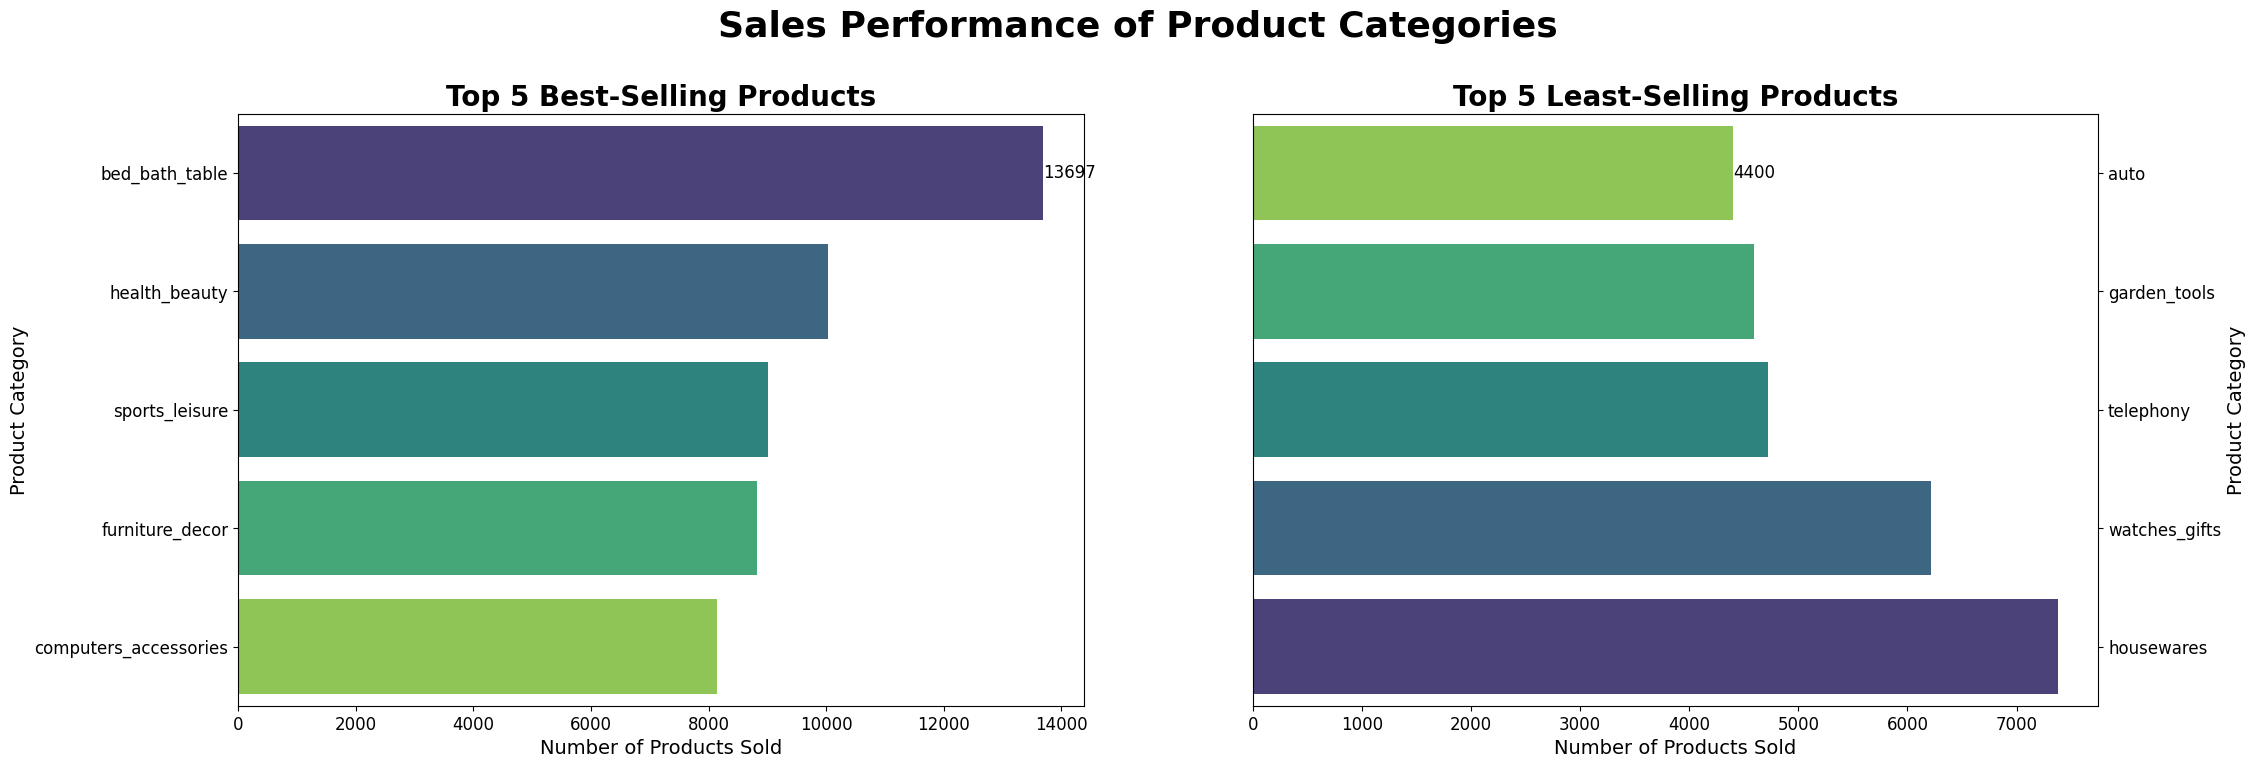

In [99]:
# Menghitung jumlah produk per kategori, mengganti nama kolom, dan mengurutkan hasil
sum_order_item_df = (
    all_data_dataset.groupby("product_category_name_english")["product_id"]
    .count()
    .reset_index()
    .rename(columns={"product_id": "products"})
    .sort_values(by="products", ascending=False)
    .head(10)
)

# Tampilkan hasil 10 kategori teratas
sum_order_item_df.head()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 8))

# Palet warna seragam dengan kontras yang tetap
palette_colors = sns.color_palette("viridis", 5)

# Grafik produk paling laris (Top 5)
sns.barplot(x="products", y="product_category_name_english",
            data=sum_order_item_df.head(5), palette=palette_colors, ax=ax[0])

# Desain untuk grafik kiri
ax[0].set_title("Top 5 Best-Selling Products", loc="center", fontsize=20, weight='bold')
ax[0].set_ylabel("Product Category", fontsize=14)
ax[0].set_xlabel("Number of Products Sold", fontsize=14)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].bar_label(ax[0].containers[0], fmt='%d', label_type='edge', fontsize=12)  # Tambahkan label di atas bar

# Grafik produk kurang laris (Bottom 5)
sns.barplot(x="products", y="product_category_name_english",
            data=sum_order_item_df.sort_values(by="products", ascending=True).head(5), palette=palette_colors[::-1], ax=ax[1])

# Desain untuk grafik kanan
ax[1].set_title("Top 5 Least-Selling Products", loc="center", fontsize=20, weight='bold')
ax[1].set_ylabel("Product Category", fontsize=14)
ax[1].set_xlabel("Number of Products Sold", fontsize=14)
# Hindari pembalikan sumbu untuk menjaga konsistensi
# ax[1].invert_xaxis()  # Dihilangkan agar lebih mudah dipahami
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].bar_label(ax[1].containers[0], fmt='%d', label_type='edge', fontsize=12)  # Tambahkan label di atas bar

# Menambahkan judul utama
plt.suptitle("Sales Performance of Product Categories", fontsize=26, weight='bold')

# Memberikan lebih banyak ruang antara judul dan grafik
plt.subplots_adjust(top=0.85)

plt.show()


Kode ini menghitung jumlah produk per kategori, mengganti nama kolom, dan mengurutkan hasil untuk menampilkan grafik yang menunjukkan 5 kategori produk terlaris dan 5 kategori produk kurang laris, menggunakan warna seragam dan penataan yang konsisten untuk visualisasi yang jelas.

### Bagaimana tren performa penjualan E-commerce dari waktu ke waktu?

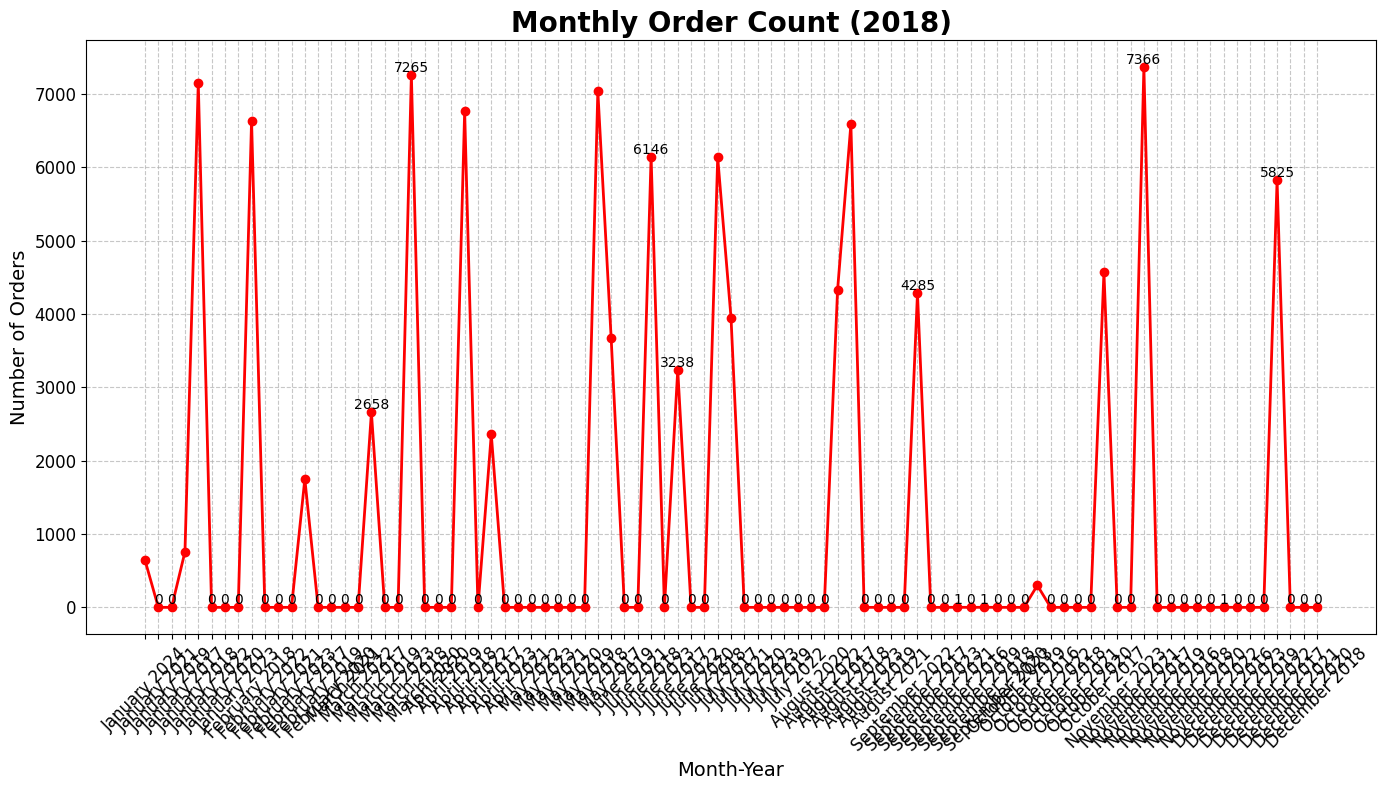

In [100]:
# Memastikan kolom 'order_approved_at' dalam format datetime
all_data_dataset['order_approved_at'] = pd.to_datetime(all_data_dataset['order_approved_at'], errors='coerce')

# Menghitung jumlah order per bulan
order_count_monthly_df = all_data_dataset.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique",
})

# Mengubah format menjadi Nama-Bulan Tahun
order_count_monthly_df.index = order_count_monthly_df.index.strftime('%B %Y')
order_count_monthly_df = order_count_monthly_df.reset_index()
order_count_monthly_df.rename(columns={"order_id": "order_count", "order_approved_at": "Month-Year"}, inplace=True)

# Mengurutkan data berdasarkan bulan dalam setahun
month_code = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

# Memecah 'Month-Year' untuk mengambil nama bulan dan mencocokkan dengan 'month_code'
order_count_monthly_df["month_numeric"] = order_count_monthly_df["Month-Year"].str.split().str[0].map(month_code)

# Mengurutkan berdasarkan 'month_numeric'
order_count_monthly_df = order_count_monthly_df.sort_values("month_numeric").drop("month_numeric", axis=1)

# Visualisasi
plt.figure(figsize=(14, 8))
plt.plot(
    order_count_monthly_df["Month-Year"],
    order_count_monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#FE0000",
    linestyle='-'
)

# Menambahkan grid
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan anotasi pada beberapa titik penting
for i, row in order_count_monthly_df.iterrows():
    # Hanya anotasi pada puncak dan lembah atau setiap 3 bulan
    if i % 3 == 0 or row["order_count"] == order_count_monthly_df["order_count"].max() or row["order_count"] == order_count_monthly_df["order_count"].min():
        plt.text(
            row["Month-Year"],
            row["order_count"],
            f'{row["order_count"]}',
            color='black',
            ha='center',
            va='bottom',
            fontsize=10
        )

# Menambahkan judul dan label yang lebih spesifik
plt.title("Monthly Order Count (2018)", loc="center", fontsize=20, weight='bold')
plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Menambahkan unit pada sumbu y
plt.ylabel("Number of Orders", fontsize=14)

# Menggunakan layout yang lebih baik
plt.tight_layout()
plt.show()


Kode ini mengonversi kolom 'order_approved_at' menjadi format datetime, menghitung jumlah pesanan per bulan, mengatur hasil dengan nama bulan dan tahun, serta memvisualisasikan data tersebut dalam grafik garis dengan anotasi pada titik penting, mengatur tampilan dengan judul dan label yang sesuai.

### Berapa total pendapatan E-commerce dalam beberapa bulan terakhir?

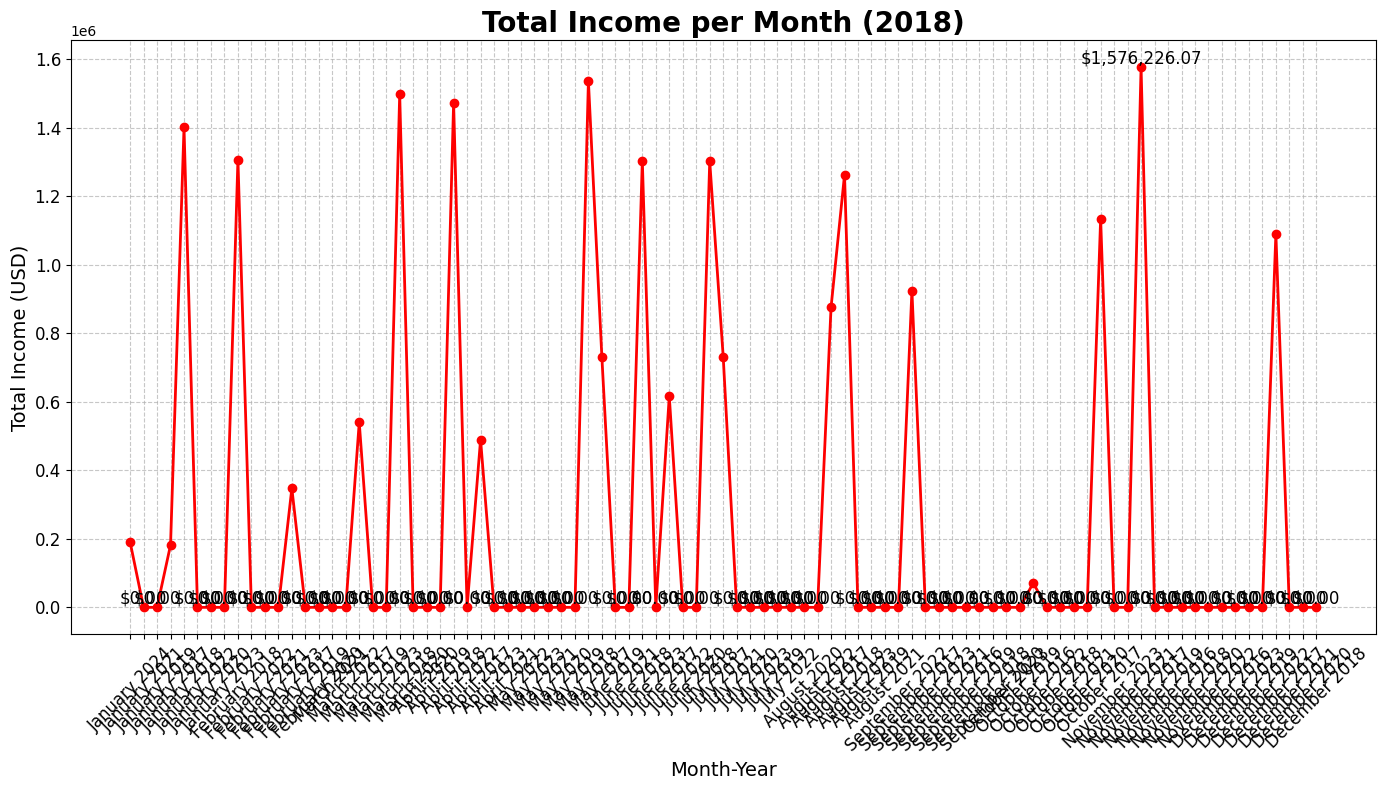

In [101]:
# Menghitung total pendapatan per bulan
monthly_income_df = all_data_dataset.resample(rule='M', on='order_approved_at').agg({
    "payment_value": "sum"
})
monthly_income_df.index = monthly_income_df.index.strftime('%B %Y')  # Mengubah format menjadi Nama-Bulan Tahun
monthly_income_df = monthly_income_df.reset_index()
monthly_income_df.rename(columns={"payment_value": "total_income"}, inplace=True)

# Mengurutkan data berdasarkan bulan
month_code = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_income_df["month_numeric"] = monthly_income_df["order_approved_at"].str.split().str[0].map(month_code)
monthly_income_df = monthly_income_df.sort_values("month_numeric")
monthly_income_df = monthly_income_df.drop("month_numeric", axis=1)

# Visualisasi
plt.figure(figsize=(14, 8))
plt.plot(
    monthly_income_df["order_approved_at"],
    monthly_income_df["total_income"],
    marker='o',
    linewidth=2,
    color="#FE0000",
    linestyle='-'
)

# Menambahkan grid dengan transparansi yang cukup
plt.grid(True, linestyle='--', alpha=0.7)

# Menambahkan anotasi hanya pada titik penting (puncak dan lembah)
for i, row in monthly_income_df.iterrows():
    # Anotasi hanya pada puncak tertinggi atau terendah
    if row["total_income"] == monthly_income_df["total_income"].max() or row["total_income"] == monthly_income_df["total_income"].min():
        plt.text(
            row["order_approved_at"],
            row["total_income"],
            f'${row["total_income"]:,.2f}',
            color='black',
            ha='center',
            va='bottom',
            fontsize=12
        )

# Menambahkan judul dan label yang lebih jelas dan informatif
plt.title("Total Income per Month (2018)", loc="center", fontsize=20, weight='bold')
plt.xlabel("Month-Year", fontsize=14)
plt.ylabel("Total Income (USD)", fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

# Menggunakan layout yang lebih baik
plt.tight_layout()

plt.show()


Kode ini menghitung total pendapatan per bulan dari data pesanan yang disetujui, mengurutkan hasilnya berdasarkan bulan, dan kemudian memvisualisasikan total pendapatan per bulan dalam bentuk grafik garis dengan anotasi pada puncak dan lembah, serta menambahkan label yang jelas dan informatif.

### Bagaimana rating atau penilaian yang diberikan oleh pelanggan terhadap E-commerce?

<ipython-input-102-49ecd2cca32f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


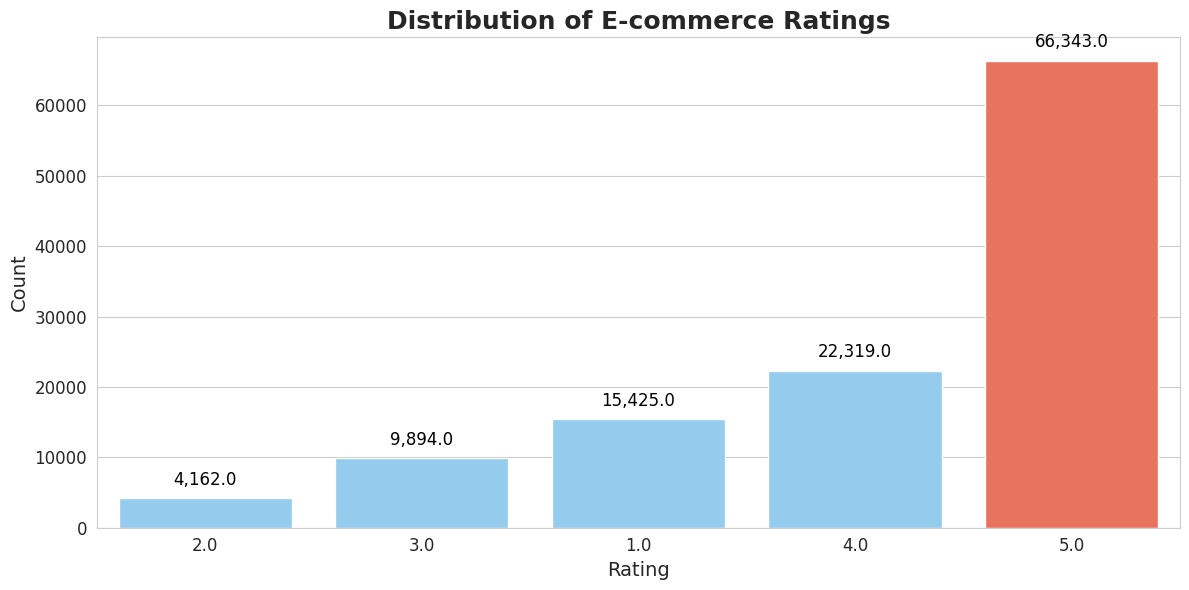

In [102]:
# Menghitung distribusi review score
review_scores = all_data_dataset['review_score'].value_counts().sort_values(ascending=True)
most_common_score = review_scores.idxmax()

# Set style
sns.set_style("whitegrid")

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=review_scores.index,
    y=review_scores.values,
    order=review_scores.index,
    palette=sns.color_palette(["#FF6347" if score == most_common_score else "#87CEFA" for score in review_scores.index])
)

# Title and labels
plt.title("Distribution of E-commerce Ratings", fontsize=18, weight='bold')
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',  # Menampilkan nilai numerik dengan pemisah ribuan
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.02 * max(review_scores.values)),  # Penempatan label
                ha='center',
                va='bottom',
                fontsize=12,
                color='black')

# Adjust layout to avoid overlap
plt.tight_layout()

plt.show()


Kode ini menghitung distribusi skor ulasan e-commerce dan memvisualisasikannya dalam bentuk diagram batang, dengan skor yang paling umum diberi warna khusus dan menambahkan anotasi pada setiap batang untuk menampilkan jumlahnya.

### Bagaimana distribusi pelanggan di platform E-commerce, dan apakah ada perbedaan preferensi pembelian di antara kelompok pelanggan yang berbeda?

<ipython-input-103-81b9b86b2328>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


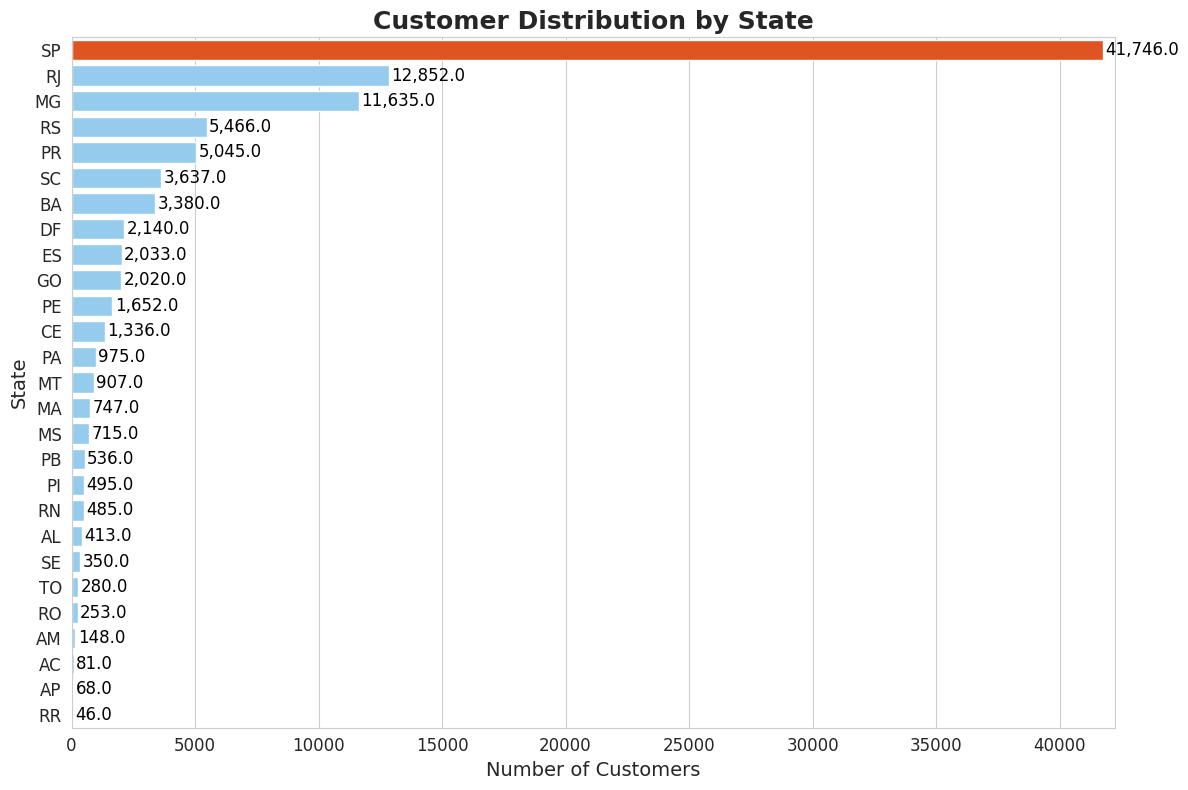

In [103]:
# Menghitung jumlah pelanggan per negara bagian
customers_by_state_df = all_data_dataset.groupby(by="customer_state").customer_id.nunique().reset_index()
customers_by_state_df.rename(columns={"customer_id": "total_customer"}, inplace=True)

# Menyiapkan visualisasi
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Menentukan negara bagian dengan jumlah pelanggan terbanyak
most_common_state = customers_by_state_df.loc[customers_by_state_df['total_customer'].idxmax(), 'customer_state']

# Mengurutkan data berdasarkan jumlah pelanggan
customers_by_state_df = customers_by_state_df.sort_values(by='total_customer', ascending=False)

# Membuat barplot horizontal
ax = sns.barplot(
    x='total_customer',
    y='customer_state',
    data=customers_by_state_df,
    palette=["#FF4500" if state == most_common_state else "#87CEFA" for state in customers_by_state_df['customer_state']],
    orient='h'
)

# Menambahkan judul dan label sumbu
plt.title("Customer Distribution by State", fontsize=18, weight='bold')
plt.xlabel("Number of Customers", fontsize=14)
plt.ylabel("State", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menyesuaikan batas sumbu x untuk proporsionalitas data
x_max = customers_by_state_df['total_customer'].max() + 500  # Sedikit tambahan untuk memberi ruang pada label
plt.xlim(0, x_max)

# Menambahkan label di atas bar untuk memastikan interpretasi yang jelas
for p in ax.patches:
    ax.annotate(f'{p.get_width():,}',  # Format angka dengan pemisah ribuan
                (p.get_width() + 100, p.get_y() + p.get_height() / 2),  # Penempatan label agar tidak tumpang tindih
                va='center',
                ha='left',
                fontsize=12,
                color='black')

# Mengatur layout agar tidak ada overlap
plt.tight_layout()

plt.show()


Kode ini menghitung jumlah pelanggan per negara bagian, kemudian membuat visualisasi barplot horizontal yang menyoroti negara bagian dengan jumlah pelanggan terbanyak dan menambahkan label pada setiap bar untuk menunjukkan jumlah pelanggan secara jelas.

<ipython-input-104-f20fdacf83bc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_order_status_df.index,


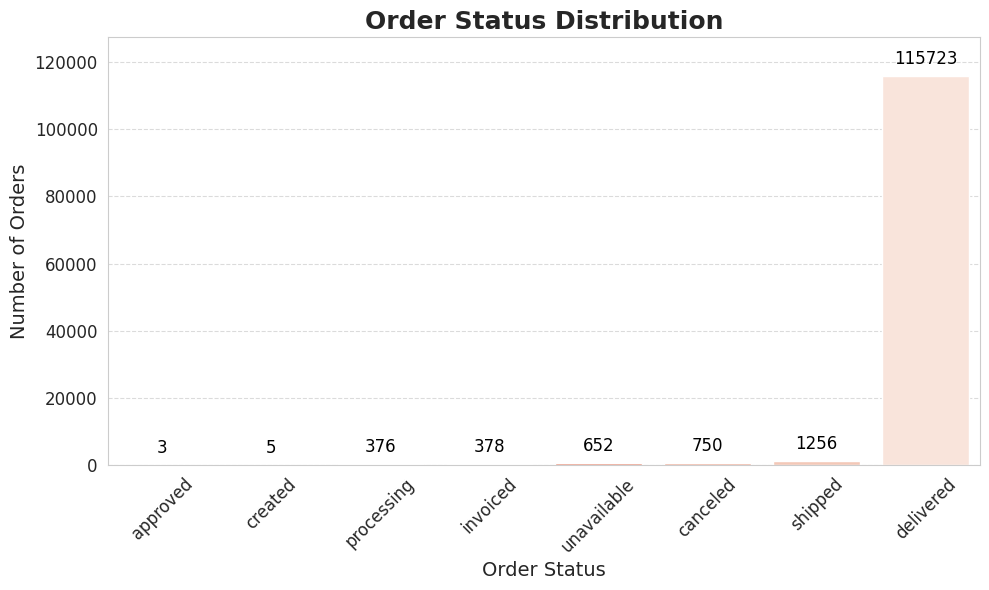

In [104]:
# Menghitung jumlah pesanan per status
total_order_status_df = all_data_dataset['order_status'].value_counts(ascending=True)

# Mengatur visualisasi
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Membuat barplot dengan pewarnaan yang tidak berlebihan
ax = sns.barplot(x=total_order_status_df.index,
                 y=total_order_status_df.values,
                 palette="Reds_r")

# Menambahkan grid hanya pada sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label pada setiap bar dengan posisi yang jelas dan tidak menumpuk
for i, v in enumerate(total_order_status_df):
    ax.text(i, v + 0.02 * total_order_status_df.max(), str(v), ha='center', va='bottom', fontsize=12, color='black')

# Menambahkan judul dan label
plt.title('Order Status Distribution', fontsize=18, weight='bold')
plt.xlabel('Order Status', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Mengatur batas sumbu y agar proporsional dan tidak melebih-lebihkan angka
plt.ylim(0, total_order_status_df.max() + 0.1 * total_order_status_df.max())

# Memastikan layout rapi dan tidak ada elemen yang terpotong
plt.tight_layout()

plt.show()

Kode ini menghitung jumlah pesanan untuk setiap status pesanan, kemudian membuat visualisasi barplot yang menampilkan distribusi status pesanan dengan warna yang tidak berlebihan, grid pada sumbu y, dan label yang jelas pada setiap bar, sambil memastikan tata letak yang rapi dan proporsional pada sumbu y.

## Analisis Lanjutan

RFM Analysis

In [105]:
# Convert date columns to datetime
order_dataset_df['order_purchase_timestamp'] = pd.to_datetime(order_dataset_df['order_purchase_timestamp'])

# Define the current date for recency calculation (choose the latest date in the dataset)
current_date = order_dataset_df['order_purchase_timestamp'].max()

# Recency: Days since the last purchase
rfm_df = order_dataset_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'count',  # Frequency
}).rename(columns={'order_purchase_timestamp': 'recency', 'order_id': 'frequency'})

# Monetary: Sum of payments for each customer
monetary_df = order_payment_df.groupby('order_id')['payment_value'].sum()
order_monetary = order_dataset_df[['order_id', 'customer_id']].merge(monetary_df, on='order_id')
monetary_df = order_monetary.groupby('customer_id')['payment_value'].sum().rename('monetary')

# Merge all three components (Recency, Frequency, Monetary)
rfm_df = rfm_df.merge(monetary_df, on='customer_id')

# Add a column for monetary with currency labels
rfm_df['monetary_label'] = rfm_df['monetary'].apply(lambda x: f'BRL {x:,.2f}')  # Assuming BRL as currency

# Display the updated RFM DataFrame
print(rfm_df.head())


                                  recency  frequency  monetary monetary_label
customer_id                                                                  
00012a2ce6f8dcda20d059ce98491703      337          1    114.74     BRL 114.74
000161a058600d5901f007fab4c27140      458          1     67.41      BRL 67.41
0001fd6190edaaf884bcaf3d49edf079      596          1    195.42     BRL 195.42
0002414f95344307404f0ace7a26f1d5      427          1    179.35     BRL 179.35
000379cdec625522490c315e70c7a9fb      198          1    107.01     BRL 107.01


Kode ini mengolah data pelanggan untuk menghitung metrik Recency, Frequency, dan Monetary (RFM) yang digunakan dalam analisis perilaku pelanggan, dengan merinci waktu sejak pembelian terakhir, frekuensi pembelian, dan total nilai pembayaran, kemudian menggabungkan hasilnya dalam satu DataFrame yang juga menambahkan label mata uang untuk nilai Monetary.

Geospatial Analysis

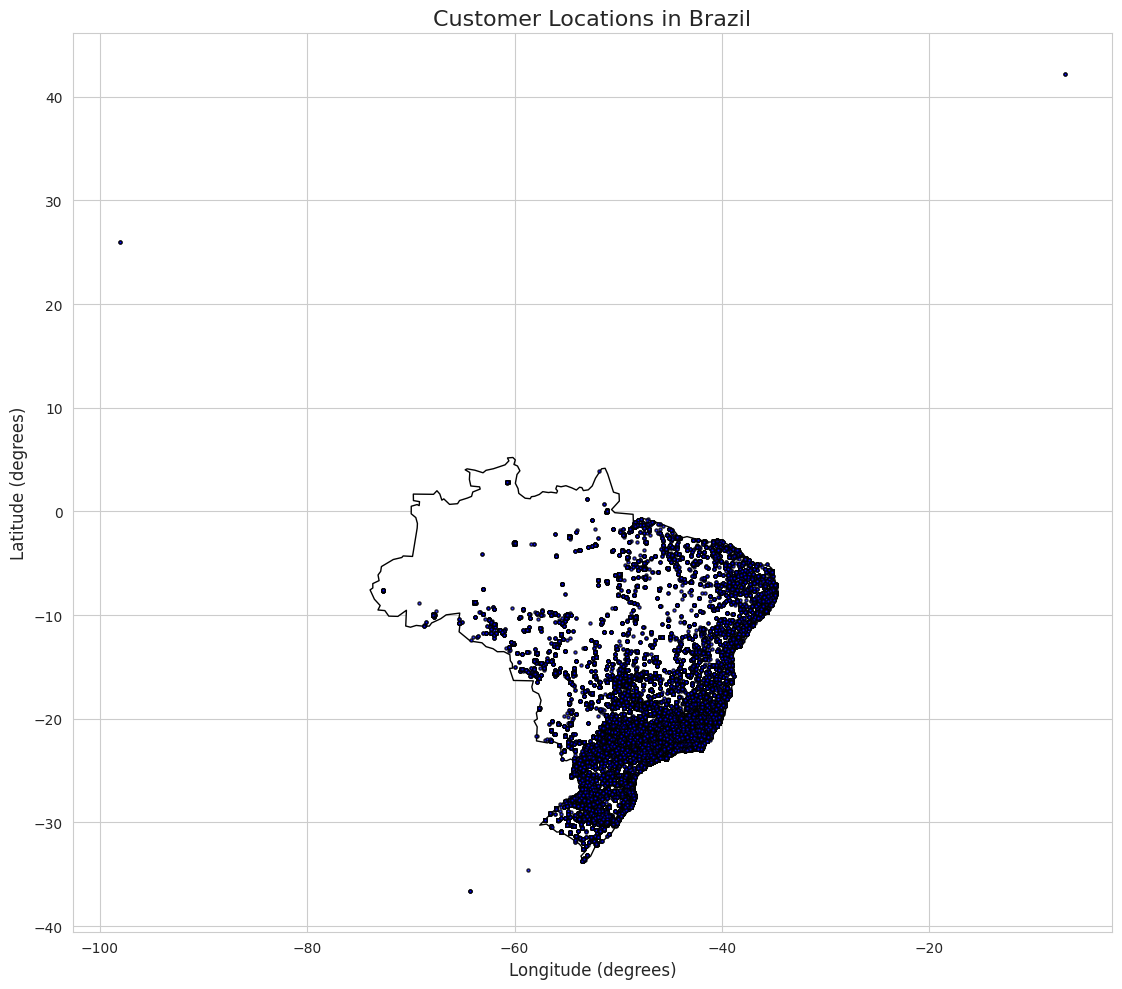

In [106]:
# Merge customer location with geolocation data
customer_geo = customer_df.merge(geolocation_df, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

# Create a GeoDataFrame for geospatial analysis
gdf = gpd.GeoDataFrame(customer_geo, geometry=gpd.points_from_xy(customer_geo.geolocation_lng, customer_geo.geolocation_lat))

# Load the Natural Earth shapefile for Brazil map
world = gpd.read_file('/content/drive/MyDrive/Submission/ne_110m_admin_0_countries.zip')

# Filter for Brazil
brazil = world[world['NAME'] == "Brazil"]

# Sample a subset of the data to plot (e.g., 10% of the total points)
gdf_sample = gdf.sample(frac=0.1, random_state=42)

# Plot Brazil and the sampled customer locations
fig, ax = plt.subplots(figsize=(12, 10))  # Adjust figure size for readability

# Plot Brazil with clear boundaries and neutral background
brazil.plot(ax=ax, color='white', edgecolor='black')

# Plot customer locations with a single color and proper sizing
gdf_sample.plot(ax=ax, color='blue', markersize=5, alpha=0.8, edgecolor='k')

# Add a clear and informative title and axis labels with units
ax.set_title('Customer Locations in Brazil', fontsize=16)
ax.set_xlabel('Longitude (degrees)', fontsize=12)
ax.set_ylabel('Latitude (degrees)', fontsize=12)

# Ensure the layout is tidy and free of unnecessary elements
plt.tight_layout()

# Optionally, add a legend for clarity if markers represent groups
plt.show()

Kode ini menggabungkan data lokasi pelanggan dengan data geolokasi, membuat sebuah `GeoDataFrame` untuk analisis spasial, memuat peta Brazil dari shapefile, memplot lokasi pelanggan di Brazil dengan sampel data, dan menampilkan peta dengan batasan yang jelas dan lokasi pelanggan yang terplot dalam warna biru.

Clustering (Manual Grouping or Binning)

In [107]:
# Check unique values in the frequency and monetary columns
print(rfm_df['frequency'].unique())
print(rfm_df['monetary'].unique())

# Binning customers into recency groups with clear labels
bins = [0, 30, 90, 180, 360, rfm_df['recency'].max()]
labels = ['< 30 days', '30-90 days', '90-180 days', '180-360 days', '> 360 days']
rfm_df['recency_group'] = pd.cut(rfm_df['recency'], bins=bins, labels=labels)

# Check if there are enough unique values to perform quantile-based binning
if len(rfm_df['frequency'].unique()) > 1:
    rfm_df['frequency_group'] = pd.qcut(rfm_df['frequency'], q=3, labels=['Low', 'Medium', 'High'])
else:
    print("Not enough unique values in 'frequency' to perform qcut.")

if len(rfm_df['monetary'].unique()) > 1:
    rfm_df['monetary_group'] = pd.qcut(rfm_df['monetary'], q=3, labels=['Low', 'Medium', 'High'])
else:
    print("Not enough unique values in 'monetary' to perform qcut.")

# Display the updated DataFrame with labels for recency, frequency, and monetary groups
print(rfm_df[['recency', 'recency_group', 'frequency', 'monetary_label']].head())

[1]
[114.74  67.41 195.42 ... 476.14 166.19  91.91]
Not enough unique values in 'frequency' to perform qcut.
                                  recency recency_group  frequency  \
customer_id                                                          
00012a2ce6f8dcda20d059ce98491703      337  180-360 days          1   
000161a058600d5901f007fab4c27140      458    > 360 days          1   
0001fd6190edaaf884bcaf3d49edf079      596    > 360 days          1   
0002414f95344307404f0ace7a26f1d5      427    > 360 days          1   
000379cdec625522490c315e70c7a9fb      198  180-360 days          1   

                                 monetary_label  
customer_id                                      
00012a2ce6f8dcda20d059ce98491703     BRL 114.74  
000161a058600d5901f007fab4c27140      BRL 67.41  
0001fd6190edaaf884bcaf3d49edf079     BRL 195.42  
0002414f95344307404f0ace7a26f1d5     BRL 179.35  
000379cdec625522490c315e70c7a9fb     BRL 107.01  


Kode ini memeriksa nilai unik dalam kolom frekuensi dan monetari, membagi pelanggan menjadi kelompok berdasarkan recency menggunakan label yang jelas, dan melakukan pemotongan berdasarkan kuantil untuk frekuensi dan monetari jika terdapat cukup nilai unik, lalu menampilkan DataFrame yang diperbarui dengan label kelompok recency, frekuensi, dan monetari.

## Conclusion

- Apa produk terlaris dan produk yang kurang laris di platform E-commerce?

Produk terlaris di platform e-commerce adalah kategori "bed, bath, table" dengan jumlah penjualan mencapai 13.867 unit. Sementara itu, produk yang paling kurang laris adalah kategori "auto" dengan jumlah penjualan hanya 4.400 unit.
- Bagaimana tren performa penjualan E-commerce dari waktu ke waktu?

Tren penjualan e-commerce pada tahun 2018 menunjukkan fluktuasi yang cukup signifikan dari bulan ke bulan. Terdapat beberapa puncak penjualan yang tinggi dan juga periode penurunan yang cukup drastis, mengindikasikan adanya faktor-faktor musiman atau kampanye pemasaran yang sangat berpengaruh terhadap volume penjualan.
- Berapa total pendapatan E-commerce dalam beberapa bulan terakhir?

Total pendapatan e-commerce mengalami fluktuasi yang cukup signifikan dari bulan ke bulan sepanjang tahun 2018. Terdapat beberapa puncak pendapatan yang tinggi dan juga periode penurunan yang cukup drastis, mengindikasikan adanya faktor-faktor musiman atau kampanye pemasaran yang sangat berpengaruh terhadap total pendapatan.
- Bagaimana rating atau penilaian yang diberikan oleh pelanggan terhadap E-commerce?

Dapat dilihat bahwa sebagian besar pelanggan memberikan rating yang sangat baik (5). Namun, terdapat juga sejumlah pelanggan yang memberikan rating yang lebih rendah, seperti 2, 3, dan 4. Hal ini menunjukkan bahwa secara keseluruhan, pelanggan cukup puas dengan layanan e-commerce tersebut, namun masih ada beberapa area yang perlu ditingkatkan untuk mendapatkan kepuasan pelanggan yang lebih optimal.
- Bagaimana distribusi pelanggan di platform E-commerce, dan apakah ada perbedaan preferensi pembelian di antara kelompok pelanggan yang berbeda?

Grafik pertama menunjukkan bahwa jumlah pelanggan e-commerce sangat bervariasi antar negara bagian, dengan negara bagian SP menjadi yang paling dominan. Perbedaan ini kemungkinan besar dipengaruhi oleh faktor-faktor seperti budaya, ekonomi, dan aksesibilitas teknologi di masing-masing wilayah.

Grafik kedua menyoroti tahap-tahap pemesanan di platform e-commerce, dengan sebagian besar pesanan berhasil diselesaikan. Namun, adanya pesanan yang masih dalam proses atau dibatalkan mengindikasikan adanya potensi perbaikan dalam proses pemenuhan pesanan.